INTRODUCTION
* You have been given a list of 12 sites on a map.
* Your objective is to design an optimal path that connects these sites.
* The path needs to be cyclic: it can start at any site but can only visit each subsequent site once (except for the start/end site).
* Your path has an important constraint: you cannot navigate directly North. Any other direction is fine. On the map below, this
means for example that travelling directly from site 2 to 8 and directly from site 4 to 6 is forbidden.
* Your task is to optimize on length: the shorter the total distance travelled, the better.


ASSIGNMENTS
* Read in the coordinates of the sites and store them in an appropriate data structure.
* Find the cycle that connects all sites and minimizes total distance travelled. Remember, each site should be visited only once
(except for the start/end site), and you cannot directly travel South → North.
* print the order in which the cycle visits the path, and the total distance travelled.

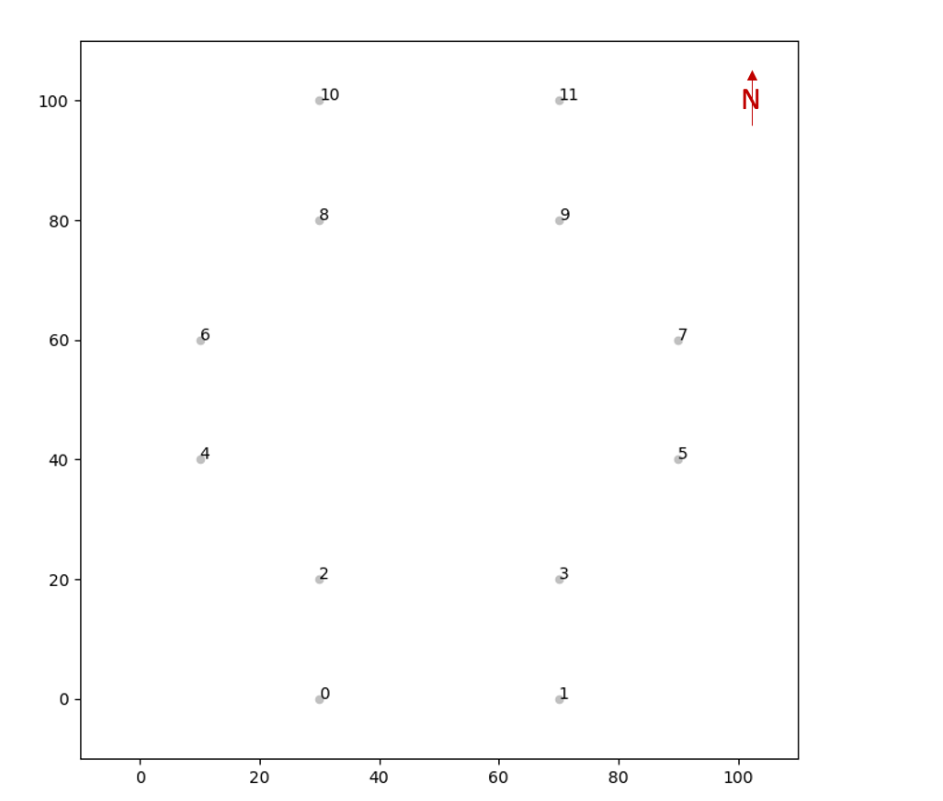

O bloco de código abaixo faz o seguinte:


*   Tranfere os dados do CSV
*   Transforma em dicionário
*   Seleciona um ponto qualquer como sendo o inicial (e claro, o final também)
*   Aplica uma função que vai gerar todas as combinações possíveis tendo em conta as restrições de começar e acabar no ponto inicial, não repetir pontos e não ir para pontos que fiquem a Norte
*   Esta função também determina dentro de todas as permutações possíveis e que fazem sentido, a que tem menor distância respeitando as regras e retorna também a distância minima
*   No final imprimo o percurso e a distância minima
*   O processamento todo é realizado chamando a função 'main'


**Vantagens:**


*   É fácil de implementar e funciona bem


**Desvantagens:**
*   Como realiza todas as permutações acaba por ser muito lento para muitos pontos (12 já demora quase 10 min a correr)





In [ ]:
!pip -q install plotly

In [ ]:
import pandas as pd #para carregar arquivos csv
import math
import random
import itertools

In [ ]:
def distance(x1, y1, x2, y2):
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5

def is_valid_move(x1, y1, x2, y2,acum_path):
    return ((x2,y2) not in acum_path) and not(x2 == x1 and y2 > y1)

def calculate_path(points, random_start):
    min_distance = float('inf')
    min_path = None
    acum_path=[]
    keys = list(points['x'].keys())
    num_points = len(keys)

    for _ in range(1):  # Iterar sobre cada ponto como ponto inicial
        keys.remove(random_start)
        keys.insert(0, random_start)
        #print("keys1:",keys)
        for perm in itertools.permutations(keys):
            if (perm[0]==random_start):
              total_distance = 0
              valid_path = True

              # Adicionar ponto inicial no final do caminho
              perm = list(perm) + [random_start]
              #print("perm:",perm)

              for i in range(len(perm)-1):
                  x1, y1 = points['x'][perm[i]], points['y'][perm[i]]
                  x2, y2 = points['x'][perm[i + 1]], points['y'][perm[i + 1]]
                  if not is_valid_move(x1, y1, x2, y2,acum_path):
                      valid_path = False
                      break
                  acum_path.append((x2,y2))
                  total_distance += distance(x1, y1, x2, y2)
              #print("total_dist:",total_distance)
              if valid_path and total_distance < min_distance:
                min_path = perm
                min_distance = total_distance
              #print("min_path:",min_path)
              #print("min_distance:",min_distance)
              #print("\n\n")
              acum_path=[]

    #print("min_path:",min_path)
    #min_path_coords = [(points['x'][idx], points['y'][idx]) for idx in min_path]
    return min_path, min_distance

def main():
    map_points = pd.read_csv('/content/drive/MyDrive/DataScience_problems/coding-challenges/1_novel_navigation.csv')

    points=map_points.to_dict()

    random_start = random.choice(list(points['x'].keys()))
    print("Ponto de partida:",random_start)
    min_path, min_distance = calculate_path(points, random_start)
    print("Conjunto de pontos que perfazem o caminho global mais curto:", min_path)
    print("Distância mínima percorrida:", min_distance)

if __name__ == "__main__":
    main()

O bloco de código abaixo faz o seguinte:


*   Tranfere os dados do CSV
*   Transforma em dicionário
*   Seleciona um ponto qualquer como sendo o inicial (e claro, o final também)
*   Aplica uma função que vai aplicar o algoritmo do **caixeiro viajante** nos pontos para descobrir de forma otimizada o menor caminho sem repetir pontos e voltando ao inicio
*  A função tem em conta a restrição de não selecionar pontos a Norte
*   No final imprime-se o percurso e a distância minima
*   O processamento todo é realizado chamando a função 'main'


**Vantagens:**


*   É bem mais otimizado que o anterior


**Desvantagens:**
*   A sua compreensão é mais complexa


[Fonte](https://www.youtube.com/watch?v=PQGmB8ulMQw)

In [4]:
!pip -q install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 43.5 MB/s eta 0:00:00


In [5]:
from pulp import *
import numpy as np
import random
import pandas as pd #para carregar arquivos csv

In [6]:

def distance(x1, y1, x2, y2):
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5

def is_valid_move(x1, y1, x2, y2):
    return not(x2 == x1 and y2 > y1) and not(x2 == x1 and y2 == y1)


def order_path(arcs, random_start):
    ordered_path = []
    current_point = random_start
    while True:
        for arc in arcs:
            if arc[0] == current_point:
                ordered_path.append(arc[0])
                current_point = arc[1]
                arcs.remove(arc)
                break
        if current_point == random_start:
            ordered_path.append(current_point)
            break
    return ordered_path


def calculate_path(points, random_start):
    #Parametros
    keys = list(points['x'].keys())
    print("keys:",keys)
    num_points = len(keys)
    arcos=[(i,j) for i in range(num_points) for j in range(num_points) if is_valid_move(points['x'][i], points['y'][i],points['x'][j], points['y'][j])]    #Iniciar LP
    #print(arcos)

    #Inicializar o LP
    tsp = LpProblem("Caminho_Mais_Curto",LpMinimize)

    #Variaveis de decisao
    x=LpVariable.dicts("x",arcos, cat="Binary")
    u= LpVariable.dicts("u",keys, lowBound=keys[1], upBound=num_points, cat = "Continuous")

    #print("x:",x)
    #print("u:",u)

    #Função objetivo
    tsp += lpSum([distance(points['x'][i], points['y'][i],points['x'][j], points['y'][j])*x[i,j] for (i,j) in arcos])
    #print("tsp:",tsp)

    #Restrição 1
    for j in range(num_points):
      tsp += lpSum([x[i,j] for (i,m) in arcos if m==j]) == 1

    #Restrição 2
    for i in range(num_points):
      tsp += lpSum([x[i,j] for (m,j) in arcos if m==i]) == 1

    #Restrição 3 - Subtour elimination
    for (i,j) in arcos:
      if i!=random_start and i!=j:
        tsp += u[i] -u[j] + num_points*x[i,j] <= num_points-1

    #Resolvendo o modelo
    resolver_modelo=tsp.solve()
    print(f"status do problema:{LpStatus[resolver_modelo]}")

    arcos_caminho=[]
    # Display variaveis
    for var in tsp.variables():
      if var.varValue > 0 and var.name[0]=="x":
        open_parenthesis = var.name.find("(")
        close_parenthesis = var.name.find(")")
        comma = var.name.find(",")
        second_underline = var.name.find("_", comma)
        i = int(var.name[open_parenthesis+1: comma])
        j = int(var.name[second_underline+1: close_parenthesis])
        arcos_caminho.append((i,j))
        #print(f"{var.name}={var.varValue}")

    #print("arcos_caminho:",arcos_caminho)

    order_path_var=order_path(arcos_caminho,random_start)


    #Display funcao objetivo
    #print(f"Custo total= {value(tsp.objective)}")

    return order_path_var,value(tsp.objective)


def main():
    map_points = pd.read_csv('/content/drive/MyDrive/DataScience_problems/coding-challenges/1_novel_navigation.csv')

    points=map_points.to_dict()

    random_start = random.choice(list(points['x'].keys()))
    #random_start=8
    print("Ponto de partida:",random_start)
    min_path, min_distance = calculate_path(points, random_start)
    print("Conjunto de pontos que perfazem o caminho global mais curto:\n", min_path)
    print("Distância mínima percorrida:\n", min_distance)

if __name__ == "__main__":
    main()

Ponto de partida: 7
keys: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
status do problema:Optimal
Conjunto de pontos que perfazem o caminho global mais curto:
 [7, 5, 3, 1, 2, 0, 4, 8, 6, 10, 11, 9, 7]
Distância mínima percorrida:
 383.7382519423689
